<a href="https://colab.research.google.com/github/JefersonSMAlmeida/portifolio_data_science/blob/main/Cidade_do_Cabo_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Cidade do Cabo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

### **Cidade do Cabo - África do Sul**

A Cidade do Cabo tem a segunda maior população de todas cidades na África do Sul e, em 2019 (pré-Covid-19), foi um dos destinos turísticos mais visitados em África, com mais de 5 milhões de passageiros passando pelo AeropCape Town International Airport (CTIA). De acordo com estimativas atuais, a população total da Cidade do Cabo chegará a cerca de 5,1 milhões em 2030.

<img alt="Cidade do Cabo" width="70%" src="https://images.unsplash.com/photo-1576485290814-1c72aa4bbb8e?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80">


A cidade é um importante polo comercial e industrial, tendo um dos principais portos do país. Sua economia é baseada nos setores de refinação de petróleo, automóveis, alimentar, químico, têxtil e construção naval. Consequentemente, é considerado o segundo maior centro financeiro, econômico e comercial da África do Sul, ficando atrás apenas de Joanesburgo.

Além disso, Cidade do Cabo é também reconhecida por suas atrações turísticas: praias paradisíacas, parques, trilhas e imensas reservas naturais, pontos de atrações capazes de atrair turistas aficionados por belezas exóticas. Com grande potencial da cidade em atrair os turistas e pela facilidade da plataforma, hoje o Airbnb representa cerca de 89% das 13.147 locações ativas no momento.

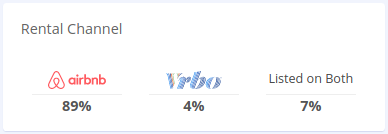


**Neste *notebook*, iremos analisar os dados referentes à Cidade do Cabo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Primeiro, precisamos adicionar as bibliotecas necessárias, sendo o Pandas para manipulação dos dados e o conjunto Matplotlib e Seaborn para gerar os gráficos. 

In [ ]:
# importar as bibliotecas necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Com as bibliotecas importadas, agora é a vez de impoartar o dataset em formato csv com os dados de hospedagem da Cidade do Cabo.

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/south-africa/wc/cape-town/2021-07-18/visualisations/listings.csv")

## Análise dos Dados


Para o começo da análise, precisamos ter conhecimento de quais informações o dataset possui. Para isso, começamos com um dicionário das variáveis existentes e logo em seguida usamos o `df.head()` para exibir os 5 primeiros registros do arquivo.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,433,3,54,2020-02-05,0.58,1,337
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2140,2,30,2018-02-11,0.68,4,284
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78799,18.46082,Entire home/apt,2800,4,0,NaN,NaN,10,365
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,Private room,682,5,5,2013-01-06,0.07,5,122
4,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,Entire home/apt,2500,14,2,2016-04-15,0.02,1,343


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O dataset possuí ao todo **16.943** entradas e **16** variáveis. Além disso, usamos o `df.dtypes` para saber quais são os tipos de variáveis.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 16943
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.280411
last_review                       0.280411
host_name                         0.001476
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Procurando por dados ausentes, notamos que a variável `neighbourhood_group` é a única que não possui registros. Logo em seguida, vemos que `reviews_per_month` e `last_review` possuem a representação de 28% de valores ausentes cada.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para entender como estão distribuidas as variáveis númericas, precisamos plotar essas informações.

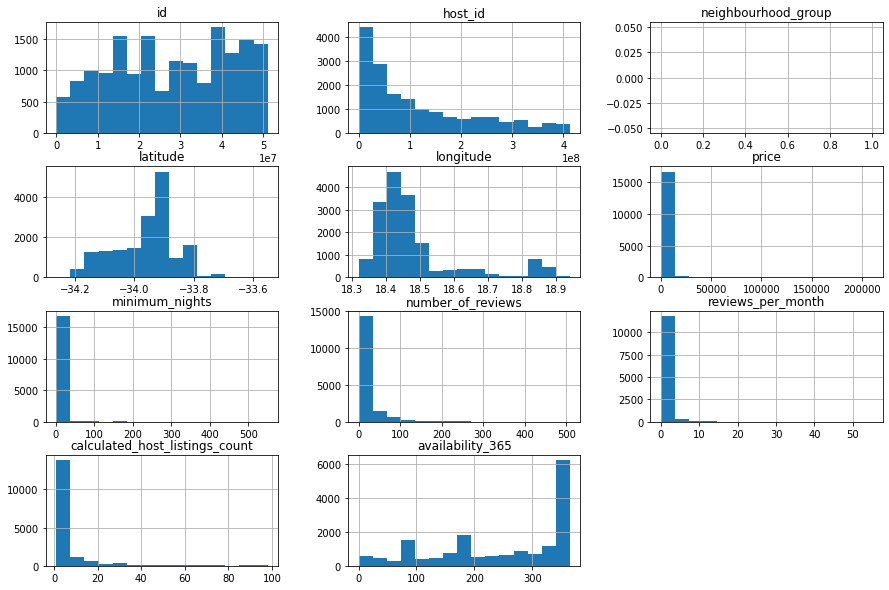

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

Aqui percebemos a presença de outliers (valores que são distoantes dos outros dados e que podem causar anomalias no estudo) nas variáveis `price`,  `minimum_nights` e `calculated_host_listings_count`. Para entender melhor esses casos, vamos usar o `df[[]].describe()` e puxar o resumo estatístico de cada uma.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,16943.000000,16943.000000,16943.000000
mean,2223.310394,4.155758,7.161955
std,5807.197948,13.735331,15.011957
min,130.000000,1.000000,1.000000
25%,600.000000,1.000000,1.000000
50%,999.000000,2.000000,2.000000
75%,2000.000000,3.000000,5.000000
max,210000.000000,550.000000,98.000000


Pontos que podemos notar a partir do método describe:
*   Na variável `price` o valor máximo é de ZAR 210.000 (cerca de BRL 75.587,31), sendo que 75% dos valores são abaixo de ZAR 2.000.
*   Em `minimum_nights`, 75% das hospedagens permitem no minimo 3 noites, e o valor máximo é de 550 noites é um valor muito acima do resto da base.
*   E o  `calculated_host_listings_count` também possui o comportamento fora da curva, onde a média é de cerca de 5 propriedades por anfitrião, mas que um deles possui 98 locações.

Além do metodo `df[[]].describe()`, podemos també plotar boxplots para identificar os outliers dentro dessas variáveis.


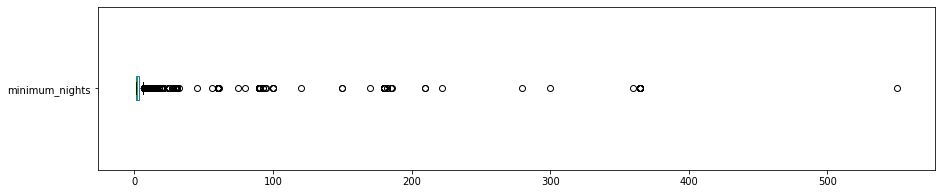

minimun_nights: valores acima de 30:
125 entradas
0.7378%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimun_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

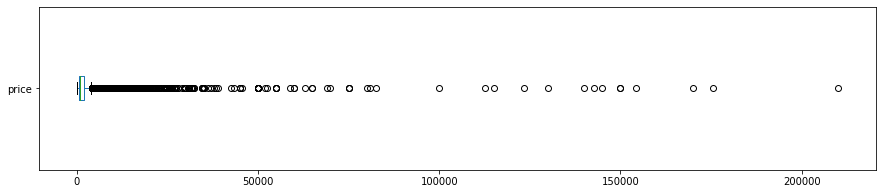


price: valores acima de 5000:
1320 entradas
7.7908%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 5000 para price
print("\nprice: valores acima de 5000:")
print("{} entradas".format(len(df[df.price > 5000])))
print("{:.4f}%".format((len(df[df.price > 5000]) / df.shape[0])*100))

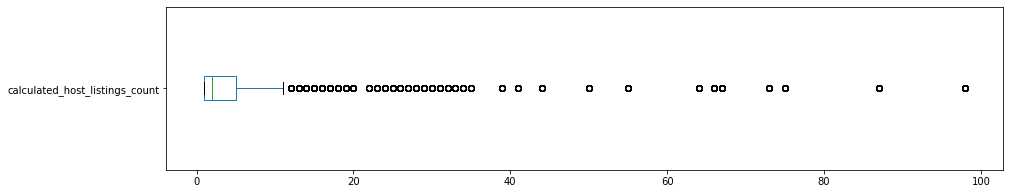


calculated_host_listings_count: valores acima de 50:
585 entradas
3.4528%


In [ ]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 50 para calculated_host_listings_count
print("\ncalculated_host_listings_count: valores acima de 50:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 50])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 50]) / df.shape[0])*100))

Agora que identificamos os outliers dessas 3 variáveis, precisamos criar uma cópia do dataset e limpar os valores para plotar novamente.

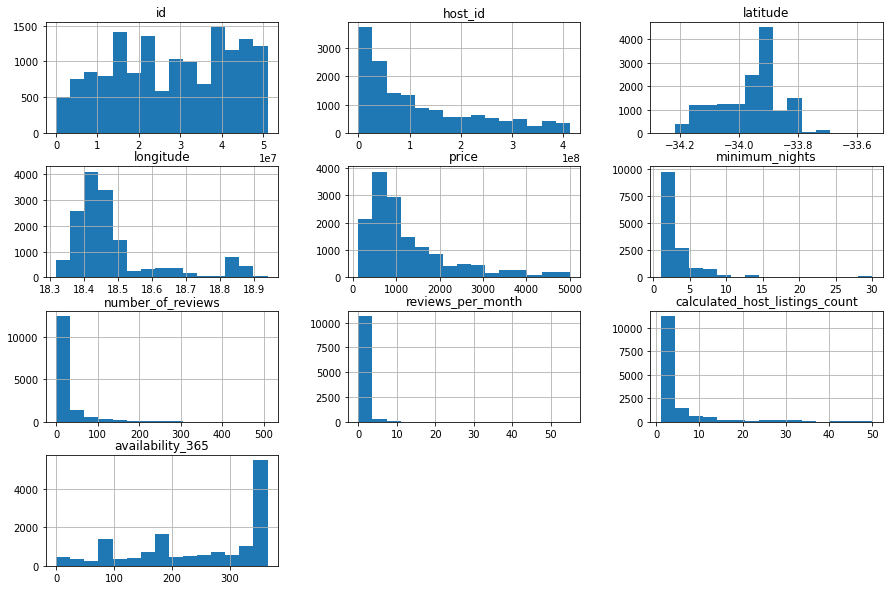

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 50].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Aproveitando o movimento, removemos também a variável `neighbourhood_group`, onde vimos anteriormente que estava completamente vazia.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

1295.9318986834191

Em média, o custo para alugar um imovel na Cidade do Cabo pela Airbnb é de ZAR 1.295,93 (BRL 466,46)

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()        

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.148222,-0.117871,-0.112482,0.019413,0.016995
minimum_nights,0.148222,1.000000,-0.071722,-0.103590,-0.104360,-0.073529
number_of_reviews,-0.117871,-0.071722,1.000000,0.493522,-0.034954,-0.062166
reviews_per_month,-0.112482,-0.103590,0.493522,1.000000,0.097227,-0.027047
calculated_host_listings_count,0.019413,-0.104360,-0.034954,0.097227,1.000000,0.096932
availability_365,0.016995,-0.073529,-0.062166,-0.027047,0.096932,1.000000


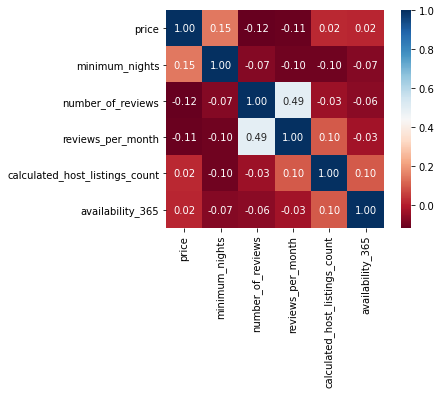

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Podemos perceber que as correlações positivas acontecem somente entre as variáveis `number_of_reviews` e `reviews_per_month`.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10680
Private room        3936
Hotel room           243
Shared room          104
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.713761
Private room       0.263049
Hotel room         0.016240
Shared room        0.006950
Name: room_type, dtype: float64

Usando a variável `room_type`, podemos ver que 71% das locações são de casas inteiras/apartamentos e 26% são quartos privados.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver quantidade de locações por bairro
df_clean.neighbourhood.value_counts()


Ward 115    2567
Ward 54     1587
Ward 77      963
Ward 23      863
Ward 64      805
            ... 
Ward 20        1
Ward 18        1
Ward 38        1
Ward 31        1
Ward 50        1
Name: neighbourhood, Length: 90, dtype: int64

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ward 69    1879.430341
Ward 32    1794.000000
Ward 71    1779.814634
Ward 54    1732.239445
Ward 74    1725.515520
Ward 62    1660.533875
Ward 61    1614.191341
Ward 14    1595.285714
Ward 59    1428.486811
Ward 86    1421.875000
Name: price, dtype: float64

Quando tentamos entender qual é localidade mais cara do nosso dataset, o primeiro fica para Ward 69. Essa região possui os bairros de fácil acesso para a praia e trilha da Noordhoek e visão para Hout Bay, além de fácil acesso ao centro da cidade, o que torna uma localização de prestigio.


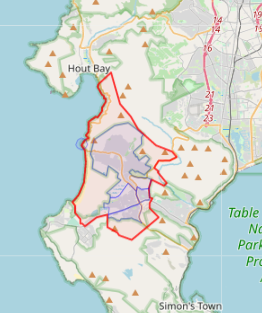

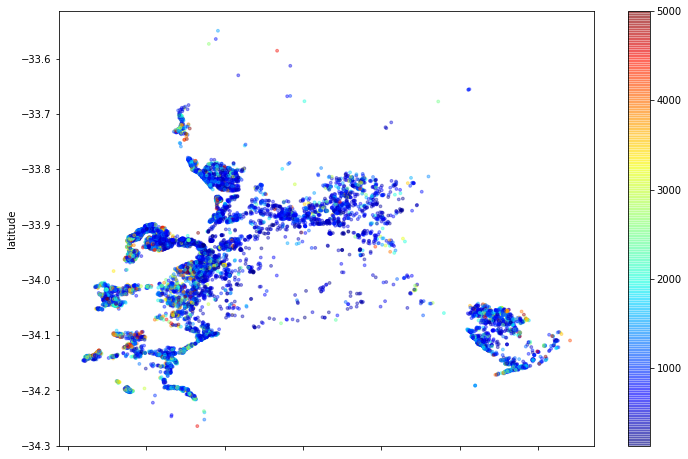

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

No gráfico acima, podemos ver a concentração de imóveis para locação utilizando os dados de latitude e longitude, além de usar o preço como parametro.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.0961705540332822

Em média, as locações da cidade pedem ao menos 3 noites no minimo para aluguel.

## Conclusões


Mesmo que seja uma visão resumida, percebemos que a base possuia alguns Outliers e que após a sua remoção, chegamosfoi possível identificar que:

*   em média, é possível alugar um local por no minimo 3 noites
*   sendo que 71% dos locais são locações de casas inteiras/apartamentos
*   o valor médio é de ZAR 1.295,93 (BRL 466,46)
*   e os bairros que possuem o valor de aluguel mais elevado fazem parte da Ward 69, com o seu preço em média de ZAR 1.879,43 (BRL 667,20).

Como se trata de uma abordagem inicial, usamos um dataset com informações resumidas para extrair uma visão sobre as hospedagens do Airbnb na região da Cidade do Cabo, e pode ser aprofundado com o dataset completo no Inside Airbnb.
